## In this Notebook we will explore the NER working areas:

### `Word Embedding (word2vec) and Bi-directional LSTM -> Spacy NER working`

We will use the same trianing example which we have in the `Tweet Sentiment Extraction` notebook.
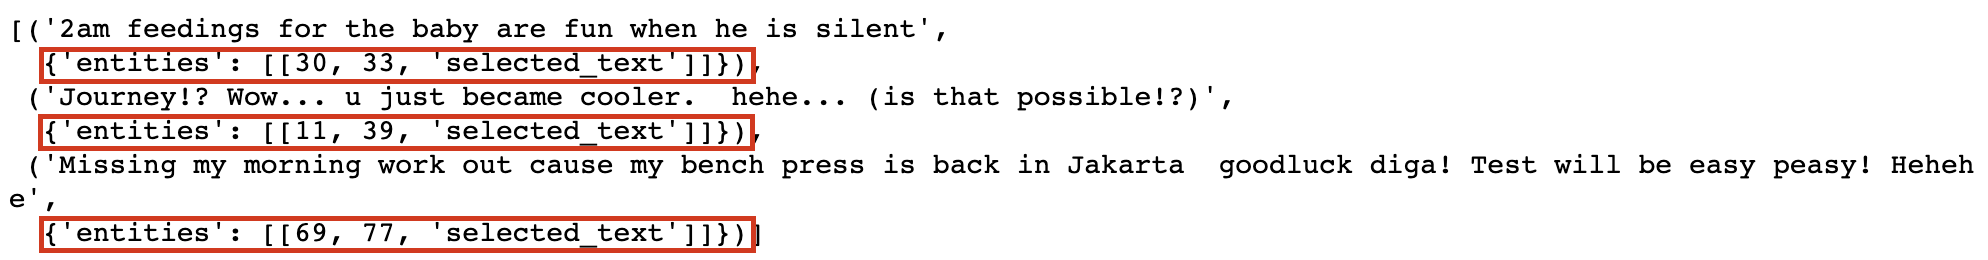

For each sentence, the entities are marked, displayed in red_squares

### `Let's explore Word2Vec embeddings for Spacy`

In [1]:
import spacy
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
nlp = spacy.load('en_core_web_md')

In [3]:
!python -m spacy info en_core_web_md


==================== Info about pipeline 'en_core_web_md' ====================

lang                en                            
name                core_web_md                   
version             3.5.0                         
description         English pipeline optimized for CPU. Components: tok2vec, tagger, parser, senter, ner, attribute_ruler, lemmatizer.
author              Explosion                     
email               contact@explosion.ai          
url                 https://explosion.ai          
license             MIT                           
spacy_version       >=3.5.0,<3.6.0                
spacy_git_version   9e0322de1                     
vectors             {'width': 300, 'vectors': 20000, 'keys': 514157, 'name': 'en_vectors'}
pipeline            ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
components          ['tok2vec', 'tagger', 'parser', 'senter', 'attribute_ruler', 'lemmatizer', 'ner']
disabled            ['senter']          

In [4]:
train_data_sample = [("2am feedings for the baby are fun when he is silent", {"entities": [[30, 33, "selected_text"]]}),
             ('Journey!? Wow... u just became cooler.  hehe... (is that possible!?)',{'entities': [[11, 39, 'selected_text']]}),
             ('Missing my morning work out cause my bench press is back in Jakarta  goodluck diga! Test will be easy peasy! Hehehe',{'entities': [[69, 77, 'selected_text']]})]

train_data_sample

[('2am feedings for the baby are fun when he is silent',
  {'entities': [[30, 33, 'selected_text']]}),
 ('Journey!? Wow... u just became cooler.  hehe... (is that possible!?)',
  {'entities': [[11, 39, 'selected_text']]}),
 ('Missing my morning work out cause my bench press is back in Jakarta  goodluck diga! Test will be easy peasy! Hehehe',
  {'entities': [[69, 77, 'selected_text']]})]

In [5]:
# fetch the trianing sentence
doc1 = nlp(train_data_sample[0][0])
doc1

2am feedings for the baby are fun when he is silent

In [6]:
doc2 = nlp(train_data_sample[1][0])
doc2

Journey!? Wow... u just became cooler.  hehe... (is that possible!?)

In [7]:
doc3 = nlp(train_data_sample[2][0])
doc3

Missing my morning work out cause my bench press is back in Jakarta  goodluck diga! Test will be easy peasy! Hehehe

In [8]:
# Now let's find how closely these sentences are related
sim_score_doc12 = doc1.similarity(doc2)
sim_score_doc13 = doc1.similarity(doc3)
sim_score_doc23 = doc2.similarity(doc3)
print(f'Doc1-Doc2: {sim_score_doc12}, Doc1-Doc3: {sim_score_doc13},Doc2-Doc3: {sim_score_doc23}')

Doc1-Doc2: 0.39828120805062217, Doc1-Doc3: 0.6647491841372699,Doc2-Doc3: 0.5372277915473774


In [9]:
token = nlp('happy')
print([(i,token,token.similarity(i))for i in doc1 if token.similarity(i)>0.2] )
print('\n')
print([(i,token,token.similarity(i))for i in doc2 if token.similarity(i)>0.2] )
print('\n')
print([(i,token,token.similarity(i))for i in doc3 if token.similarity(i)>0.2])

[(am, happy, 0.25760567375470894), (baby, happy, 0.3673031411708075), (fun, happy, 0.5143635903376693), (when, happy, 0.28905955024959124), (silent, happy, 0.23390371082524622)]


[(!, happy, 0.34887284707131955), (?, happy, 0.29409360955321756), (..., happy, 0.4430304172469948), (just, happy, 0.5190206199812774), (cooler, happy, 0.22587990326438287), (., happy, 0.21611136605108056), (..., happy, 0.4430304172469948), (that, happy, 0.34218547990208154), (possible, happy, 0.34224300008794967), (!, happy, 0.34887284707131955), (?, happy, 0.29409360955321756)]


[(my, happy, 0.3457088163886044), (morning, happy, 0.27151439171263714), (work, happy, 0.26833972049490196), (my, happy, 0.3457088163886044), (back, happy, 0.28410745830172873), (goodluck, happy, 0.3851089232850058), (!, happy, 0.34887284707131955), (will, happy, 0.35284265565263756), (easy, happy, 0.4305569610164342), (peasy, happy, 0.4305569610164342), (!, happy, 0.34887284707131955)]


In [10]:
token = nlp('sad')
print([(i,token,token.similarity(i))for i in doc1 if token.similarity(i)>0.2] )
print('\n')
print([(i,token,token.similarity(i))for i in doc2 if token.similarity(i)>0.2] )
print('\n')
print([(i,token,token.similarity(i))for i in doc3 if token.similarity(i)>0.2])

[(am, sad, 0.26927774563287177), (baby, sad, 0.2143027248318723), (fun, sad, 0.27388308489901414), (silent, sad, 0.2064944998650622)]


[(?, sad, 0.20343061126211406), (Wow, sad, 0.32561094788783723), (just, sad, 0.26805534921876056), (?, sad, 0.20343061126211406)]


[(my, sad, 0.23704187224961623), (my, sad, 0.23704187224961623)]


In [11]:
token = nlp('action')
print([(i,token,token.similarity(i))for i in doc1 if token.similarity(i)>0.2] )
print('\n')
print([(i,token,token.similarity(i))for i in doc2 if token.similarity(i)>0.2] )
print('\n')
print([(i,token,token.similarity(i))for i in doc3 if token.similarity(i)>0.2])

[(feedings, action, 0.3854142493337812), (for, action, 0.29380767242532807), (the, action, 0.5644864068829454), (are, action, 0.25092732886408403), (when, action, 0.2477772843335786), (is, action, 0.2263723006336479)]


[(., action, 0.22358596877587605), (is, action, 0.2263723006336479), (that, action, 0.5152717071797863), (possible, action, 0.47927079647627935)]


[(Missing, action, 0.3030410153666064), (morning, action, 0.21993403778309092), (work, action, 0.45512376154810186), (cause, action, 0.3993425906986868), (press, action, 0.42523942659114744), (is, action, 0.2263723006336479), (in, action, 0.23886297889211508), (will, action, 0.29430867953810697), (be, action, 0.23709125448938256)]


In [12]:
token = nlp('wow!')
print([(i,token,token.similarity(i))for i in doc1 if token.similarity(i)>0.2] )
print('\n')
print([(i,token,token.similarity(i))for i in doc2 if token.similarity(i)>0.2] )
print('\n')
print([(i,token,token.similarity(i))for i in doc3 if token.similarity(i)>0.2])

[(baby, wow!, 0.26453022041078483), (fun, wow!, 0.44057535326312736)]


[(!, wow!, 0.870532987926077), (?, wow!, 0.3738909458152576), (Wow, wow!, 0.5665391810732539), (..., wow!, 0.4663438882235922), (u, wow!, 0.2934589776751069), (just, wow!, 0.33234326763276956), (cooler, wow!, 0.2475529896780461), (., wow!, 0.3458553956402262), (hehe, wow!, 0.4492879217469096), (..., wow!, 0.4663438882235922), (!, wow!, 0.870532987926077), (?, wow!, 0.3738909458152576)]


[(my, wow!, 0.33947366246026667), (my, wow!, 0.33947366246026667), (goodluck, wow!, 0.3016472975871362), (!, wow!, 0.870532987926077), (easy, wow!, 0.3078373309749663), (peasy, wow!, 0.3078373309749663), (!, wow!, 0.870532987926077), (Hehehe, wow!, 0.4492879217469096)]


###### We can easily see, that whenever the `contextual word` matches, the score goes up for similarity. Check `wow!`.  
This is basically the intuition of Word2Vec, to look for  similarity scores over unseen/normal-english contextual features and use the power of positional embeddings to extract more information.  

Embeddings are way to represent the data using positional embeddings technique.

In [13]:
df = pd.DataFrame(train_data_sample, columns=["text", "entities"])
# Add the NER component to the pipeline
ner = nlp.create_pipe("ner")

In [14]:
df

,text,entities
0,2am feedings for the baby are fun when he is s...,"{'entities': [[30, 33, 'selected_text']]}"
1,Journey!? Wow... u just became cooler. hehe.....,"{'entities': [[11, 39, 'selected_text']]}"
2,Missing my morning work out cause my bench pre...,"{'entities': [[69, 77, 'selected_text']]}"
